In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
def euclidean_dist(pt1, pt2):
    return np.linalg.norm(pt2-pt1)

def knn(X, y, x_pred, k):
    distances = []
    
    # Calculate distance between X features and input point
    for i in range(len(X)):
        distance = euclidean_dist(x_pred, X[i])
        identifier = np.array([distance, y[i]])
        distances.append(identifier)
    
    # Sort distances (associated with their classes) by distance value
    distances = np.array(distances)
    distances = distances[distances[:, 0].argsort()]
    
    # Get nearest K neighbors
    neighbors = distances[0:k]
    
    # Count votes of each class
    unique, counts = np.unique(neighbors[:,1], return_counts=True)
    votes = np.asarray((unique, counts)).T
    
    # Return max voted class
    winner_index = votes[:,1].argmax()
    y_pred = votes.astype(int)[winner_index,0]
    return y_pred

Text(0.5, 1.0, 'Data')

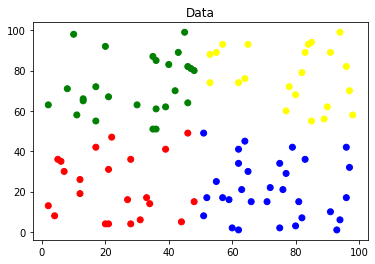

In [3]:
# Generate data

X_train = np.random.randint(1, 100, (100,2))
y = np.array([])

# Set classes based on coordinates
for i in range(len(X_train)):
    if X_train[i, 0] <= 50 and X_train[i, 1] <= 50:
        y = np.append(y, 0)
    elif X_train[i, 0] <= 50 and X_train[i, 1] > 50:
        y = np.append(y, 1)
    elif X_train[i, 0] > 50 and X_train[i, 1] <= 50:
        y = np.append(y, 2)
    else:
        y = np.append(y, 3)

colors = ["red", "green", "blue", "yellow"]
plt.scatter(X_train[:,0], X_train[:,1], c=y, cmap=ListedColormap(colors))
plt.title("Data")

Text(0.5, 1.0, 'Data and new sample')

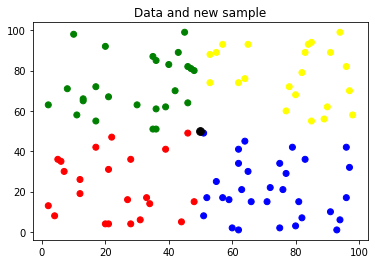

In [4]:
# Create sample point
sample = np.array([50,50])
plt.scatter(X_train[:,0], X_train[:,1], c=y, cmap=ListedColormap(colors))
plt.scatter(sample[0], sample[1], c="black", s=60)
plt.title("Data and new sample")

In [5]:
# Classify sample point
k = 3
y_pred = knn(X_train, y, sample, k)
y_color = colors[y_pred]
print(y_color)

red
